#Join data

In [2]:
# import pandas as pd
# import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


ModuleNotFoundError: No module named 'seaborn'

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
items.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,name,category,item_id
0,jam monster blueberry,Creamy liquid,1
1,jam monster strwberry,Creamy liquid,2
2,Caliburn gz2 pod,pod system,3
3,cookies & cream 100ml,Creamy liquid,4
4,mora,Creamy liquid,5


In [ ]:
sales_items.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,sale_id,item_id,quantity_purchased
0,1,14,1
1,2,41,1
2,2,48,2
3,3,45,1
4,4,14,1


In [ ]:
#join table
df = pd.merge(items, sales_items, on='item_id', how='inner')
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,name,category,item_id,sale_id,quantity_purchased
0,jam monster blueberry,Creamy liquid,1,560,1
1,jam monster blueberry,Creamy liquid,1,21090,1
2,jam monster strwberry,Creamy liquid,2,29,1
3,jam monster strwberry,Creamy liquid,2,287,1
4,jam monster strwberry,Creamy liquid,2,375,1
...,...,...,...,...,...
78828,Joiway galaxy pod,pod system,1845,50555,1
78829,ghost rabbit 60ml,atomizer,1846,50147,1
78830,ghost rabbit 60ml,atomizer,1846,50249,1
78831,ghost rabbit 60ml,atomizer,1846,50271,1


#Transform to transaction input for apriori model

In [ ]:
# Assuming 'df' is your DataFrame

# Group by 'sale_id' and aggregate the rest of the columns
transactions = df.groupby(['sale_id', 'name']).size().unstack(fill_value=0)

# Reset the index to make 'sale_id' and 'name' as regular columns
transactions = transactions.reset_index()

# Fill NaN values with 0
transactions = transactions.fillna(0)

# Convert non-zero values to 1
transactions[transactions > 0] = 1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
transactions = transactions.drop(columns=['sale_id'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
transactions

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


name,Batre molicell 2600,Carlo 100ml,Croffle boy 30ml,batre cylaid 3100mah,cool water 60ml,killer salt 30ml,..,AN Rda,Abidin 60ml,Adapter drag s/x,...,zeus dual,zoo pod,zoo rda,zoo tech coil,zoo tech pod,zoo/teros one catdrige,zugus 30ml salt,zulu salt 30ml,zux out wild cracks 100ml,zuxxs/luxxs 30ml salt
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51081,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
51082,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
51083,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
51084,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# # Save the DataFrame to a CSV file (optional step)
# transactions.to_csv('final_transactions.csv', index=False, header=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# transaction = pd.read_csv('/content/final_transactions.csv')
# transaction

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Apriori using MLXTEnd

In [ ]:
!pip install mlxtend

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Min support 0.001

In [ ]:
from mlxtend.frequent_patterns import association_rules, apriori
f_items = apriori(transactions, min_support = 0.001, use_colnames = True)
f_items

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.001370,( Croffle boy 30ml)
1,0.001468,( killer salt 30ml)
2,0.003935,(..)
3,0.001077,(Abidin 60ml)
4,0.002721,(Aegis boost pod)
...,...,...
311,0.001860,"(minuman teh pucuk, Malomo coil singel)"
312,0.001390,"(vtc 4 batre, Malomo coil singel)"
313,0.001331,"(wd liquid 60ml, Malomo coil singel)"
314,0.001037,"(minuman teh pucuk, Minuman nipis madu)"


In [ ]:
apriori_rules = association_rules(f_items, metric = "lift", min_threshold = 0.001)
apriori_rules.sort_values('confidence', ascending = False, inplace = True)
apriori_rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(catridge caliburn g),(Coil caliburn g),0.003073,0.011764,0.001742,0.566879,48.185657,0.001706,2.281661,0.982266
36,(ursa baby pro pod),(Minuman nipis madu),0.003152,0.018342,0.001625,0.515528,28.107002,0.001567,2.026244,0.967471
32,(wd liquid 60ml),(Malomo coil singel),0.005246,0.091375,0.001331,0.253731,2.776804,0.000852,1.217557,0.643248
19,(Oat drip 60ml ),(Malomo coil singel),0.011608,0.091375,0.002271,0.195616,2.140791,0.001210,1.129590,0.539141
2,(Drip tip 510/810 aleader),(Malomo coil singel),0.006284,0.091375,0.001077,0.171340,1.875118,0.000502,1.096498,0.469651
26,(minuman le mineral),(Malomo coil singel),0.017950,0.091375,0.002819,0.157034,1.718558,0.001179,1.077890,0.425759
1,(Coil caliburn g),(catridge caliburn g),0.011764,0.003073,0.001742,0.148087,48.185657,0.001706,1.170221,0.990904
28,(minuman teh pucuk),(Malomo coil singel),0.012763,0.091375,0.001860,0.145706,1.594583,0.000693,1.063597,0.377697
16,(Minuman nipis madu),(Malomo coil singel),0.018342,0.091375,0.002584,0.140875,1.541720,0.000908,1.057617,0.357939
20,(cotton bacon prime),(Malomo coil singel),0.023842,0.091375,0.003073,0.128900,1.410663,0.000895,1.043077,0.298224


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


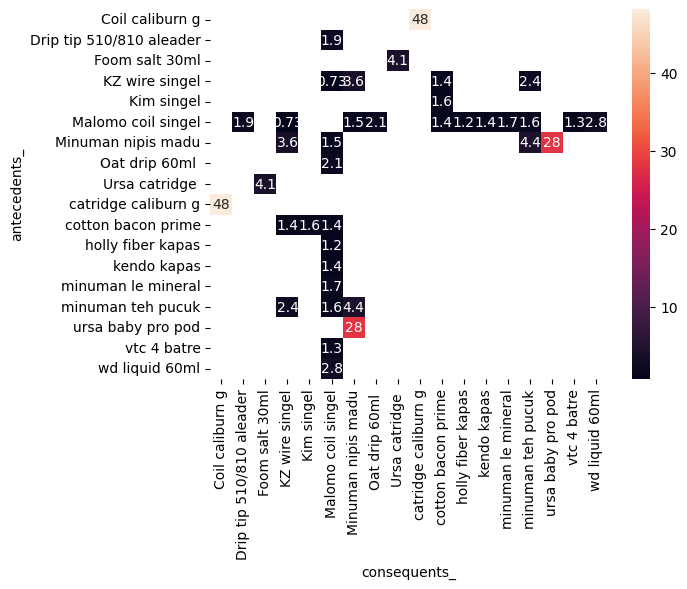

In [ ]:
apriori_rules['lhs_items'] = apriori_rules['antecedents'].apply(lambda x:len(x) )
apriori_rules[apriori_rules['lhs_items']>1].sort_values('lift', ascending=False).head()
apriori_rules['antecedents_'] = apriori_rules['antecedents'].apply(lambda a: ','.join(list(a)))
apriori_rules['consequents_'] = apriori_rules['consequents'].apply(lambda a: ','.join(list(a)))
pivot = apriori_rules[apriori_rules['lhs_items']==1].pivot(index = 'antecedents_', columns = 'consequents_', values= 'lift')
# apriori_rules
sns.heatmap(pivot, annot = True)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

In [ ]:
!pip install PyARMViz

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# import shutil
# shutil.rmtree('/content/PyARMViz')
# shutil.rmtree('/content/PyARMVizj')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from PyARMViz.Rule import generate_rule_from_dict
import numpy as np
apriori_vis = apriori_rules

apriori_vis['uni'] = np.nan
apriori_vis['ant'] = np.nan
apriori_vis['con'] = np.nan
apriori_vis['tot'] = 51086 #sesuai baris dataset hasil pengolahan

def tran():
    for t in transactions:
        yield t
def antec(x):
    cnt = 0
    for t in tran():
        t = set(t)
        if x.intersection(t) == x:
            cnt = cnt + 1
    return cnt
vis = apriori_vis.values.tolist()

rules_dict = []
for i in vis:
    i[10] = antec(i[0])
    i[11] = antec(i[1])
    i[9] = antec(i[0].union(i[1]))
    diction = {
        'lhs': tuple(i[0]),
        'rhs': tuple(i[1]),
        'count_full': i[9],
        'count_lhs': i[10],
        'count_rhs': i[11],
        'num_transactions': i[12]
    }
    rules_dict.append(diction)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
rules_dict

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[{'lhs': ('catridge caliburn g',),
  'rhs': ('Coil caliburn g',),
  'count_full': 0,
  'count_lhs': 0,
  'count_rhs': 0,
  'num_transactions': 'Coil caliburn g'},
 {'lhs': ('ursa baby pro pod',),
  'rhs': ('Minuman nipis madu',),
  'count_full': 0,
  'count_lhs': 0,
  'count_rhs': 0,
  'num_transactions': 'Minuman nipis madu'},
 {'lhs': ('wd liquid 60ml',),
  'rhs': ('Malomo coil singel',),
  'count_full': 0,
  'count_lhs': 0,
  'count_rhs': 0,
  'num_transactions': 'Malomo coil singel'},
 {'lhs': ('Oat drip 60ml ',),
  'rhs': ('Malomo coil singel',),
  'count_full': 0,
  'count_lhs': 0,
  'count_rhs': 0,
  'num_transactions': 'Malomo coil singel'},
 {'lhs': ('Drip tip 510/810 aleader',),
  'rhs': ('Malomo coil singel',),
  'count_full': 0,
  'count_lhs': 0,
  'count_rhs': 0,
  'num_transactions': 'Malomo coil singel'},
 {'lhs': ('minuman le mineral',),
  'rhs': ('Malomo coil singel',),
  'count_full': 0,
  'count_lhs': 0,
  'count_rhs': 0,
  'num_transactions': 'Malomo coil singel'},


In [ ]:
!pip install networkx
!pip install plotly

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# import plotly.graph_objects as go
# import networkx as nx
# import numpy as np

# from PyARMViz.Rule import Rule

# from typing import List
# import itertools

# import logging

# import math

# def metadata_scatter_plot(rules:List, allow_compound_flag:bool=False):
#     '''
#     Visualizes the distribution of Association Rule Confidence, Support and Lift in the form of a
#     Plotly scatterplot
#     '''
#     id_list = []
#     confidence_list = []
#     lift_list = []
#     support_list = []

#     for rule in rules:
#         #Discard compound rules (either pre or antecedents) if indicated
#         if allow_compound_flag == False:
#             if len(rule.rhs) > 1 or len(rule.lhs) > 1:
#                 continue

#         confidence_list.append(rule.confidence)
#         lift_list.append(rule.lift)
#         support_list.append(rule.support)
#         hover_text = "{} => {}, Lift: {}".format(rule.lhs, rule.rhs, rule.lift)
#         id_list.append(hover_text)

#     colorbar=dict(
#         tick0=0,
#         dtick=1
#     )


#     fig = go.Figure(data=go.Scatter(x=support_list, y=confidence_list, text = id_list, mode='markers', marker={'color': lift_list, 'colorscale': "purp", 'colorbar':{'title': 'Lift'}},))
#     fig.update_layout(title="Association Rules Strength Distribution", xaxis_title="Support", yaxis_title="Confidence", xaxis={'autorange':'reversed'},)
#     fig.show()
#     return fig

# def adjacency_parallel_category_plot(rules:List):
#     '''
#         Visualizes the antecedents and consequents of each association rules by drawing lines
#         representing each rule across identical vertical axes representing the potential items
#         in the entire dataset

#         Similar to parallel coordinate plot but more readible for small numbers of categorical
#         points
#     '''
#     unique_entities_by_axis_count = []
#     rules_by_axis_count = []
#     for rule in rules:
#         axis_required = len(rule.lhs) + 1

#         #Filter out rules with multiple consequents
#         #TODO consider allowing multiple consequents
#         if len(rule.rhs) == 1:
#             #If the rules_by_axis_count list lacks a slot for the current number of antacedents, add them
#             while len(rules_by_axis_count) < axis_required - 1:
#                 rules_by_axis_count.append([])
#                 unique_entities_by_axis_count.append(set())

#             #Add the rule and the entities found in its atecedents and consequents to their respective structure
#             rules_by_axis_count[axis_required - 2].append(rule)
#             unique_entities_by_axis_count[axis_required - 2] = unique_entities_by_axis_count[axis_required - 2].union(set(rule.lhs), set(rule.rhs))

#     axis_counter = 2
#     for rules, unique_entities in zip(rules_by_axis_count, unique_entities_by_axis_count):
#         line_color = list(map(lambda rule: round(rule.confidence, 2), rules))

#         dimensions = _parallel_category_builder(rules, axis_counter)
#         fig = go.Figure(data=
#             go.Parcats(
#                 dimensions = dimensions,
#             )
#         )

#         fig.update_layout(
#             plot_bgcolor = 'white',
#             paper_bgcolor = 'white'
#         )

#         fig.show()
#         axis_counter += 1

# def adjacency_parallel_coordinate_plot(rules:List):
#     '''
#         Visualizes the antecedents and consequents of each rule by drawing lines
#         representing each rule across identical vertical axis representing the
#         potential items in the set

#         Has the advantage of making it easier to visualize compound rules over
#         scatterplots
#     '''

#     #These two structures track the rules and entities therein based on the number of antecedents/consequents involved
#     #Allows us to visualize each number separately in a parallel coordinate graph
#     #Note these are indexed 0->2 axis on (no association rule can have less then 2)
#     unique_entities_by_axis_count = []
#     rules_by_axis_count = []
#     for rule in rules:
#         axis_required = len(rule.lhs) + 1

#         #Filter out rules with multiple consequents
#         #TODO consider allowing multiple consequents
#         if len(rule.rhs) == 1:
#             #If the rules_by_axis_count list lacks a slot for the current number of antacedents, add them
#             while len(rules_by_axis_count) < axis_required - 1:
#                 rules_by_axis_count.append([])
#                 unique_entities_by_axis_count.append(set())

#             #Add the rule and the entities found in its atecedents and consequents to their respective structure
#             rules_by_axis_count[axis_required - 2].append(rule)
#             unique_entities_by_axis_count[axis_required - 2] = unique_entities_by_axis_count[axis_required - 2].union(set(rule.lhs), set(rule.rhs))


#     axis_counter = 2
#     for rules, unique_entities in zip(rules_by_axis_count, unique_entities_by_axis_count):
#         unique_entities = list(unique_entities)
#         unique_entities = _parallel_coord_axis_optimizer(rules, unique_entities, axis_counter)

#         line_color = list(map(lambda rule: round(rule.confidence, 2), rules))

#         dimensions = _paracoord_builder(rules, unique_entities, axis_counter)
#         fig = go.Figure(data=
#             go.Parcoords(
#                 line = dict(color = line_color,
#                            colorscale = [[0,'white'], [1,'red']]),
#                 dimensions = dimensions
#             )
#         )

#         fig.update_layout(
#             plot_bgcolor = 'white',
#             paper_bgcolor = 'white'
#         )

#         fig.show()
#         axis_counter += 1

# def _parallel_coord_axis_optimizer(rules:List, unique_entities:List, axis_count:int):
#     '''
#         Accepts the rules, a list of the entities to be included in each axis, and the number of axis

#         Runs simulations to identify the optimum configuration of entities on those axis in order to
#         avoid crossings

#         Returns that optimum configuration as an ordered list
#     '''
#     #Generate all possible combinations of entities on the axis and calculate their expected crossings
#     max_iterations = 1000
#     cross_counts = []
#     permutations = set()

#     iteration_counter = 0
#     maximum_permutations = math.factorial(len(unique_entities))
#     while len(permutations) < maximum_permutations and len(permutations) < max_iterations:
#         perm = np.random.permutation(unique_entities)
#         permutations.add(tuple(perm))
#         iteration_counter += 1
#     permutations = list(permutations)
#     logging.info("Finished computing {} random axis entity arrangement permutations in {} iterations".format(len(permutations), iteration_counter))

#     for permutation in permutations:
#         cross_count = _parallel_coord_cross_counter(rules, permutation, axis_count)
#         cross_counts.append(cross_count)
#         logging.debug("Counted {} crossings for {}".format(cross_count, permutation))

#     optimum_cross_count = min(cross_counts)
#     optimum_axis_configuration = permutations[cross_counts.index(optimum_cross_count)]
#     logging.info("Found optimum solution {} with {} crossings".format(optimum_axis_configuration, min(cross_counts)))
#     return optimum_axis_configuration

# def _parallel_coord_cross_counter(rules:List, unique_entities_permutation:List, axis_count:int):
#     '''
#         Accepts an axis configuration and computes the number of crossings across all consecutive
#         axis pairs in order to determine the overall number of crossings

#         Note this approach works because the entity order is synchronized on all axis

#         Returns the number of crossings
#     '''

#     #Iterates through consecutive axis pairs
#     cross_count = 0
#     for axis_index in range(0, axis_count - 1):
#         #Generate all possible pairs of relevant rules and test if they cross for this axis
#         combinations = itertools.combinations(rules, 2)
#         for rule1, rule2 in combinations:
#             if axis_index < (axis_count - 1) - 1:
#                 src_axis_position1 = rule1.lhs[axis_index]
#                 dst_axis_position1 = rule2.lhs[axis_index]
#                 src_axis_position2 = rule1.lhs[axis_index + 1]
#                 dst_axis_position2 = rule2.lhs[axis_index + 1]
#             #Handles the final axis pair which involves the consequent
#             else:
#                 src_axis_position1 = rule1.lhs[axis_index]
#                 dst_axis_position1 = rule2.lhs[axis_index]
#                 src_axis_position2 = rule1.rhs[0]
#                 dst_axis_position2 = rule2.rhs[0]

#             src_delta = unique_entities_permutation.index(src_axis_position1) - unique_entities_permutation.index(src_axis_position2)
#             dst_delta = unique_entities_permutation.index(dst_axis_position1) - unique_entities_permutation.index(dst_axis_position2)

#             #A cross exists only if the edges terminations swap being above/below the other on each side
#             if src_delta < 0 and dst_delta > 0:
#                 cross_count += 1
#             elif src_delta > 0 and dst_delta < 0:
#                 cross_count += 1
#     return cross_count

# def _paracoord_builder(rules:List, unique_entities:List, axis_count:int):
#     '''
#         Helper function to generate list of unique entities across all provided rules to build axis_index
#     '''
#     axis_objects = []
#     for axis_index in range(0,axis_count):
#         if axis_index < axis_count - 1:
#             antacedent_count = abs(axis_index - (axis_count - 1))
#             label = "Antacedent {}".format(antacedent_count)
#         else:
#             label = "Consequent"


#         #Iterate through rules, identify those relevant to that axis_index, and collect their values
#         values = []
#         for rule in rules:
#             #For all but the last axis_index, pull value from the left hand antacedents
#             if axis_index < axis_count - 1:
#                 #If available, pull out the antacedent for this axis_index, otherwise add placeholder
#                 if axis_index > len(rule.lhs) - 1:
#                     values.append(None)
#                 else:
#                     #Note field contains the index of the value on the axis_index
#                     values.append(unique_entities.index(rule.lhs[axis_index]))
#             #Otherwise add the right hand consequent
#             else:
#                 #Note field contains the index of the value on the axis_index
#                 values.append(unique_entities.index(rule.rhs[0]))

#         #Compose the plot object for this axis_index
#         axis_object = dict(
#             range = [0, len(unique_entities)],
#             label=label,
#             ticktext=unique_entities,
#             tickvals=list(range(0, len(unique_entities))),
#             values=values
#         )
#         axis_objects.append(axis_object)

#     return axis_objects

# def _parallel_category_builder(rules:List, axis_count:int):
#     '''
#         Helper function to generate list of unique entities across all provided rules to build axis_index
#     '''
#     axis_objects = []
#     for axis_index in range(0,axis_count):
#         if axis_index < axis_count - 1:
#             antacedent_count = abs(axis_index - (axis_count - 1))
#             label = "Antacedent {}".format(antacedent_count)
#         else:
#             label = "Consequent"

#         #Iterate through rules, identify those relevant to that axis_index, and collect their values
#         values = []
#         for rule in rules:
#             #For all but the last axis_index, pull value from the left hand antacedents
#             if axis_index < axis_count - 1:
#                 #If available, pull out the antacedent for this axis_index, otherwise add placeholder
#                 if axis_index > len(rule.lhs) - 1:
#                     values.append(None)
#                 else:
#                     #Note field contains the index of the value on the axis_index
#                     values.append(rule.lhs[axis_index])
#             #Otherwise add the right hand consequent
#             else:
#                 #Note field contains the index of the value on the axis_index
#                 values.append(rule.rhs[0])
#         #Compose the plot object for this axis_index
#         axis_object = dict(
#             label=label,
#             values=values,
#         )
#         axis_objects.append(axis_object)

#     return axis_objects

# def adjacency_graph_plotly(rules:Rule):
#     '''
#         This is the plotly version of the
#     '''
#     graph = _adjacency_graph_generator(rules)
#     pos = nx.spring_layout(graph, iterations=100)

#     edge_x = []
#     edge_y = []
#     for edge in graph.edges():
#         src_node_ind = edge[0]
#         dst_node_ind = edge[1]
#         x0, y0 =  pos[src_node_ind]
#         x1, y1 =  pos[dst_node_ind]
#         edge_x.append(x0)
#         edge_x.append(x1)
#         edge_x.append(None)
#         edge_y.append(y0)
#         edge_y.append(y1)
#         edge_y.append(None)

#     edge_trace = go.Scatter(
#         x=edge_x, y=edge_y,
#         line=dict(width=0.5, color='#888'),
#         hoverinfo='none',
#         mode='lines')

#     node_text = []
#     node_x = []
#     node_y = []
#     for node in graph.nodes():
#         x, y = pos[node]
#         node_x.append(x)
#         node_y.append(y)
#         node_text.append(node)


#     node_trace = go.Scatter(
#         x=node_x, y=node_y,
#         mode='markers',
#         hoverinfo='text',
#         text=node_text,
#         marker=dict(
#             showscale=True,
#             # colorscale options
#             #'Greys' | 'YlGnBu' | 'Greens' | 'YlOrRd' | 'Bluered' | 'RdBu' |
#             #'Reds' | 'Blues' | 'Picnic' | 'Rainbow' | 'Portland' | 'Jet' |
#             #'Hot' | 'Blackbody' | 'Earth' | 'Electric' | 'Viridis' |
#             colorscale='YlGnBu',
#             reversescale=True,
#             color=[],
#             size=10,
#             colorbar=dict(
#                 thickness=15,
#                 title='Node Connections',
#                 xanchor='left',
#                 titleside='right'
#             ),
#             line_width=2))
#     fig = go.Figure(data=[edge_trace, node_trace],
#          layout=go.Layout(
#             title='<br>Network graph made with Python',
#             titlefont_size=16,
#             showlegend=False,
#             hovermode='closest',
#             margin=dict(b=20,l=5,r=5,t=40),
#             annotations=[ dict(
#                 text="Python code: <a href='https://plotly.com/ipython-notebooks/network-graphs/'> https://plotly.com/ipython-notebooks/network-graphs/</a>",
#                 showarrow=False,
#                 xref="paper", yref="paper",
#                 x=0.005, y=-0.002 ) ],
#             xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
#             yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
#             )
#     fig.show()

# def adjacency_graph_gephi(rules:List[Rule], output_path:str=None):
#     '''
#     Uses networkX to produce a directed graph representation of the generated
#     association rules (both 1-to-1 and compound).

#     Either displays the resulting graph in the browser with Plotly or
#     export it as a graphml file to be viewed in a program like Gephi
#     '''
#     graph = _adjacency_graph_generator(rules)
#     nx.write_gexf(graph, output_path)
#     logging.debug("Output rule graph to {}".format(output_path))
#     return graph

# def _adjacency_graph_generator(rules:List[Rule]):
#     '''
#         Helper function to generate a directional network graph using the antecedents and
#         precedents of each Association Rule. This allows the user to discern higher level
#         structures such as chains and hubs which are formed by adjacent rules.

#         The resulting graph can then be visualized through a variety of means
#     '''
#     graph = nx.DiGraph()
#     for index, rule in enumerate(rules):
#         graph.add_node (index, Weight=int(rule.confidence*10), type="Association_Rule")

#         for entity in rule.lhs:
#             graph.add_node(entity, Weight=1, type="Entity")
#             graph.add_edge(entity, index, Normalized_Lift=int(rule.lift*10))

#         for entity in rule.rhs:
#             graph.add_node(entity, Weight=1, type="Entity")
#             graph.add_edge(index, entity, Normalized_Lift=int(rule.lift*10))

#     logging.debug("Generated NetworkX graph for {} rules with {} nodes".format(len(rules), len(graph.nodes)))
#     return graph



# def adjacency_scatter_plot(rules:List[Rule], notebook_flag:bool = False):
#     '''
#     Generates a plot showing the distribution of association rules in terms of association
#     rules between antecedent and consequent entities, support and confidence

#     Visulizes this plot as a Plotly scattergraph and views it in the browser
#     '''
#     unique_values = set()
#     x_axis = []
#     y_axis = []
#     strength = []
#     for index, rule in enumerate(rules):
#         x_axis.append(str(rule.rhs))
#         y_axis.append(str(rule.lhs))
#         strength.append(20 * rule.confidence)
#         unique_values.add(str(rule.rhs))
#         unique_values.add(str(rule.lhs))

#     #Generate distance matrix view
#     fig = go.Figure()

#     fig.add_trace(go.Scatter(
#         x=x_axis,
#         y=y_axis,
#         mode="markers",
#         marker = {'size':strength},
#         name='Association rules',
#     ))

#     fig.show()
#     return fig

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
rules = []
for rd in rules_dict:
    rules.append(generate_rule_from_dict(rd))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[{catridge caliburn g} -> {Coil caliburn g},
 {ursa baby pro pod} -> {Minuman nipis madu},
 {wd liquid 60ml} -> {Malomo coil singel},
 {Oat drip 60ml } -> {Malomo coil singel},
 {Drip tip 510/810 aleader} -> {Malomo coil singel},
 {minuman le mineral} -> {Malomo coil singel},
 {Coil caliburn g} -> {catridge caliburn g},
 {minuman teh pucuk} -> {Malomo coil singel},
 {Minuman nipis madu} -> {Malomo coil singel},
 {cotton bacon prime} -> {Malomo coil singel},
 {kendo kapas} -> {Malomo coil singel},
 {Minuman nipis madu} -> {KZ wire singel},
 {vtc 4 batre} -> {Malomo coil singel},
 {holly fiber kapas} -> {Malomo coil singel},
 {Foom salt 30ml} -> {Ursa catridge },
 {Minuman nipis madu} -> {ursa baby pro pod},
 {minuman teh pucuk} -> {Minuman nipis madu},
 {minuman teh pucuk} -> {KZ wire singel},
 {KZ wire singel} -> {Malomo coil singel},
 {KZ wire singel} -> {Minuman nipis madu},
 {Minuman nipis madu} -> {minuman teh pucuk},
 {cotton bacon prime} -> {Kim singel},
 {cotton bacon prime} -> 

### Min support 0.002


In [ ]:
from mlxtend.frequent_patterns import association_rules, apriori
f_items = apriori(transactions, min_support = 0.002, use_colnames = True)
f_items

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.003935,(..)
1,0.002721,(Aegis boost pod)
2,0.002623,(Beku 60ml)
3,0.003347,(Bqs asgard)
4,0.011373,(Bqs coil usa)
...,...,...
141,0.002584,"(Minuman nipis madu, Malomo coil singel)"
142,0.002271,"(Malomo coil singel, Oat drip 60ml )"
143,0.003073,"(cotton bacon prime, Malomo coil singel)"
144,0.002584,"(holly fiber kapas, Malomo coil singel)"


In [ ]:
apriori_rules = association_rules(f_items, metric = "lift", min_threshold = 0.001)
apriori_rules.sort_values('confidence', ascending = False, inplace = True)
apriori_rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
7,(Oat drip 60ml ),(Malomo coil singel),0.011608,0.091375,0.002271,0.195616,2.140791,0.001210,1.129590,0.539141
12,(minuman le mineral),(Malomo coil singel),0.017950,0.091375,0.002819,0.157034,1.718558,0.001179,1.077890,0.425759
4,(Minuman nipis madu),(Malomo coil singel),0.018342,0.091375,0.002584,0.140875,1.541720,0.000908,1.057617,0.357939
8,(cotton bacon prime),(Malomo coil singel),0.023842,0.091375,0.003073,0.128900,1.410663,0.000895,1.043077,0.298224
2,(Minuman nipis madu),(KZ wire singel),0.018342,0.033923,0.002212,0.120598,3.555021,0.001590,1.098561,0.732136
10,(holly fiber kapas),(Malomo coil singel),0.023588,0.091375,0.002584,0.109544,1.198831,0.000429,1.020403,0.169861
0,(KZ wire singel),(Malomo coil singel),0.033923,0.091375,0.002271,0.066936,0.732539,-0.000829,0.973807,-0.274277
3,(KZ wire singel),(Minuman nipis madu),0.033923,0.018342,0.002212,0.065205,3.555021,0.001590,1.050132,0.743945
9,(Malomo coil singel),(cotton bacon prime),0.091375,0.023842,0.003073,0.033633,1.410663,0.000895,1.010132,0.320389
13,(Malomo coil singel),(minuman le mineral),0.091375,0.017950,0.002819,0.030848,1.718558,0.001179,1.013309,0.460165


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


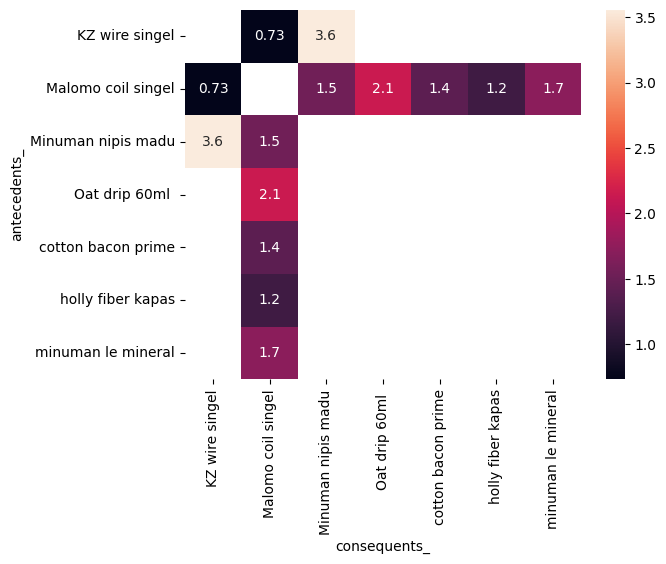

In [ ]:
apriori_rules['lhs_items'] = apriori_rules['antecedents'].apply(lambda x:len(x) )
apriori_rules[apriori_rules['lhs_items']>1].sort_values('lift', ascending=False).head()
apriori_rules['antecedents_'] = apriori_rules['antecedents'].apply(lambda a: ','.join(list(a)))
apriori_rules['consequents_'] = apriori_rules['consequents'].apply(lambda a: ','.join(list(a)))
pivot = apriori_rules[apriori_rules['lhs_items']==1].pivot(index = 'antecedents_', columns = 'consequents_', values= 'lift')
# apriori_rules
sns.heatmap(pivot, annot = True)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

In [ ]:
!pip install PyARMViz

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# import shutil
# shutil.rmtree('/content/PyARMViz')
# shutil.rmtree('/content/PyARMVizj')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from PyARMViz.Rule import generate_rule_from_dict
import numpy as np
apriori_vis = apriori_rules

apriori_vis['uni'] = np.nan
apriori_vis['ant'] = np.nan
apriori_vis['con'] = np.nan
apriori_vis['tot'] = 51086 #sesuai baris dataset hasil pengolahan

def tran():
    for t in transactions:
        yield t
def antec(x):
    cnt = 0
    for t in tran():
        t = set(t)
        if x.intersection(t) == x:
            cnt = cnt + 1
    return cnt
vis = apriori_vis.values.tolist()

rules_dict = []
for i in vis:
    i[10] = antec(i[0])
    i[11] = antec(i[1])
    i[9] = antec(i[0].union(i[1]))
    diction = {
        'lhs': tuple(i[0]),
        'rhs': tuple(i[1]),
        'count_full': i[9],
        'count_lhs': i[10],
        'count_rhs': i[11],
        'num_transactions': i[12]
    }
    rules_dict.append(diction)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
rules_dict

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[{'lhs': ('Oat drip 60ml ',),
  'rhs': ('Malomo coil singel',),
  'count_full': 0,
  'count_lhs': 0,
  'count_rhs': 0,
  'num_transactions': 'Malomo coil singel'},
 {'lhs': ('minuman le mineral',),
  'rhs': ('Malomo coil singel',),
  'count_full': 0,
  'count_lhs': 0,
  'count_rhs': 0,
  'num_transactions': 'Malomo coil singel'},
 {'lhs': ('Minuman nipis madu',),
  'rhs': ('Malomo coil singel',),
  'count_full': 0,
  'count_lhs': 0,
  'count_rhs': 0,
  'num_transactions': 'Malomo coil singel'},
 {'lhs': ('cotton bacon prime',),
  'rhs': ('Malomo coil singel',),
  'count_full': 0,
  'count_lhs': 0,
  'count_rhs': 0,
  'num_transactions': 'Malomo coil singel'},
 {'lhs': ('Minuman nipis madu',),
  'rhs': ('KZ wire singel',),
  'count_full': 0,
  'count_lhs': 0,
  'count_rhs': 0,
  'num_transactions': 'KZ wire singel'},
 {'lhs': ('holly fiber kapas',),
  'rhs': ('Malomo coil singel',),
  'count_full': 0,
  'count_lhs': 0,
  'count_rhs': 0,
  'num_transactions': 'Malomo coil singel'},
 {'lh

In [ ]:
!pip install networkx
!pip install plotly

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# import plotly.graph_objects as go
# import networkx as nx
# import numpy as np

# from PyARMViz.Rule import Rule

# from typing import List
# import itertools

# import logging

# import math

# def metadata_scatter_plot(rules:List, allow_compound_flag:bool=False):
#     '''
#     Visualizes the distribution of Association Rule Confidence, Support and Lift in the form of a
#     Plotly scatterplot
#     '''
#     id_list = []
#     confidence_list = []
#     lift_list = []
#     support_list = []

#     for rule in rules:
#         #Discard compound rules (either pre or antecedents) if indicated
#         if allow_compound_flag == False:
#             if len(rule.rhs) > 1 or len(rule.lhs) > 1:
#                 continue

#         confidence_list.append(rule.confidence)
#         lift_list.append(rule.lift)
#         support_list.append(rule.support)
#         hover_text = "{} => {}, Lift: {}".format(rule.lhs, rule.rhs, rule.lift)
#         id_list.append(hover_text)

#     colorbar=dict(
#         tick0=0,
#         dtick=1
#     )


#     fig = go.Figure(data=go.Scatter(x=support_list, y=confidence_list, text = id_list, mode='markers', marker={'color': lift_list, 'colorscale': "purp", 'colorbar':{'title': 'Lift'}},))
#     fig.update_layout(title="Association Rules Strength Distribution", xaxis_title="Support", yaxis_title="Confidence", xaxis={'autorange':'reversed'},)
#     fig.show()
#     return fig

# def adjacency_parallel_category_plot(rules:List):
#     '''
#         Visualizes the antecedents and consequents of each association rules by drawing lines
#         representing each rule across identical vertical axes representing the potential items
#         in the entire dataset

#         Similar to parallel coordinate plot but more readible for small numbers of categorical
#         points
#     '''
#     unique_entities_by_axis_count = []
#     rules_by_axis_count = []
#     for rule in rules:
#         axis_required = len(rule.lhs) + 1

#         #Filter out rules with multiple consequents
#         #TODO consider allowing multiple consequents
#         if len(rule.rhs) == 1:
#             #If the rules_by_axis_count list lacks a slot for the current number of antacedents, add them
#             while len(rules_by_axis_count) < axis_required - 1:
#                 rules_by_axis_count.append([])
#                 unique_entities_by_axis_count.append(set())

#             #Add the rule and the entities found in its atecedents and consequents to their respective structure
#             rules_by_axis_count[axis_required - 2].append(rule)
#             unique_entities_by_axis_count[axis_required - 2] = unique_entities_by_axis_count[axis_required - 2].union(set(rule.lhs), set(rule.rhs))

#     axis_counter = 2
#     for rules, unique_entities in zip(rules_by_axis_count, unique_entities_by_axis_count):
#         line_color = list(map(lambda rule: round(rule.confidence, 2), rules))

#         dimensions = _parallel_category_builder(rules, axis_counter)
#         fig = go.Figure(data=
#             go.Parcats(
#                 dimensions = dimensions,
#             )
#         )

#         fig.update_layout(
#             plot_bgcolor = 'white',
#             paper_bgcolor = 'white'
#         )

#         fig.show()
#         axis_counter += 1

# def adjacency_parallel_coordinate_plot(rules:List):
#     '''
#         Visualizes the antecedents and consequents of each rule by drawing lines
#         representing each rule across identical vertical axis representing the
#         potential items in the set

#         Has the advantage of making it easier to visualize compound rules over
#         scatterplots
#     '''

#     #These two structures track the rules and entities therein based on the number of antecedents/consequents involved
#     #Allows us to visualize each number separately in a parallel coordinate graph
#     #Note these are indexed 0->2 axis on (no association rule can have less then 2)
#     unique_entities_by_axis_count = []
#     rules_by_axis_count = []
#     for rule in rules:
#         axis_required = len(rule.lhs) + 1

#         #Filter out rules with multiple consequents
#         #TODO consider allowing multiple consequents
#         if len(rule.rhs) == 1:
#             #If the rules_by_axis_count list lacks a slot for the current number of antacedents, add them
#             while len(rules_by_axis_count) < axis_required - 1:
#                 rules_by_axis_count.append([])
#                 unique_entities_by_axis_count.append(set())

#             #Add the rule and the entities found in its atecedents and consequents to their respective structure
#             rules_by_axis_count[axis_required - 2].append(rule)
#             unique_entities_by_axis_count[axis_required - 2] = unique_entities_by_axis_count[axis_required - 2].union(set(rule.lhs), set(rule.rhs))


#     axis_counter = 2
#     for rules, unique_entities in zip(rules_by_axis_count, unique_entities_by_axis_count):
#         unique_entities = list(unique_entities)
#         unique_entities = _parallel_coord_axis_optimizer(rules, unique_entities, axis_counter)

#         line_color = list(map(lambda rule: round(rule.confidence, 2), rules))

#         dimensions = _paracoord_builder(rules, unique_entities, axis_counter)
#         fig = go.Figure(data=
#             go.Parcoords(
#                 line = dict(color = line_color,
#                            colorscale = [[0,'white'], [1,'red']]),
#                 dimensions = dimensions
#             )
#         )

#         fig.update_layout(
#             plot_bgcolor = 'white',
#             paper_bgcolor = 'white'
#         )

#         fig.show()
#         axis_counter += 1

# def _parallel_coord_axis_optimizer(rules:List, unique_entities:List, axis_count:int):
#     '''
#         Accepts the rules, a list of the entities to be included in each axis, and the number of axis

#         Runs simulations to identify the optimum configuration of entities on those axis in order to
#         avoid crossings

#         Returns that optimum configuration as an ordered list
#     '''
#     #Generate all possible combinations of entities on the axis and calculate their expected crossings
#     max_iterations = 1000
#     cross_counts = []
#     permutations = set()

#     iteration_counter = 0
#     maximum_permutations = math.factorial(len(unique_entities))
#     while len(permutations) < maximum_permutations and len(permutations) < max_iterations:
#         perm = np.random.permutation(unique_entities)
#         permutations.add(tuple(perm))
#         iteration_counter += 1
#     permutations = list(permutations)
#     logging.info("Finished computing {} random axis entity arrangement permutations in {} iterations".format(len(permutations), iteration_counter))

#     for permutation in permutations:
#         cross_count = _parallel_coord_cross_counter(rules, permutation, axis_count)
#         cross_counts.append(cross_count)
#         logging.debug("Counted {} crossings for {}".format(cross_count, permutation))

#     optimum_cross_count = min(cross_counts)
#     optimum_axis_configuration = permutations[cross_counts.index(optimum_cross_count)]
#     logging.info("Found optimum solution {} with {} crossings".format(optimum_axis_configuration, min(cross_counts)))
#     return optimum_axis_configuration

# def _parallel_coord_cross_counter(rules:List, unique_entities_permutation:List, axis_count:int):
#     '''
#         Accepts an axis configuration and computes the number of crossings across all consecutive
#         axis pairs in order to determine the overall number of crossings

#         Note this approach works because the entity order is synchronized on all axis

#         Returns the number of crossings
#     '''

#     #Iterates through consecutive axis pairs
#     cross_count = 0
#     for axis_index in range(0, axis_count - 1):
#         #Generate all possible pairs of relevant rules and test if they cross for this axis
#         combinations = itertools.combinations(rules, 2)
#         for rule1, rule2 in combinations:
#             if axis_index < (axis_count - 1) - 1:
#                 src_axis_position1 = rule1.lhs[axis_index]
#                 dst_axis_position1 = rule2.lhs[axis_index]
#                 src_axis_position2 = rule1.lhs[axis_index + 1]
#                 dst_axis_position2 = rule2.lhs[axis_index + 1]
#             #Handles the final axis pair which involves the consequent
#             else:
#                 src_axis_position1 = rule1.lhs[axis_index]
#                 dst_axis_position1 = rule2.lhs[axis_index]
#                 src_axis_position2 = rule1.rhs[0]
#                 dst_axis_position2 = rule2.rhs[0]

#             src_delta = unique_entities_permutation.index(src_axis_position1) - unique_entities_permutation.index(src_axis_position2)
#             dst_delta = unique_entities_permutation.index(dst_axis_position1) - unique_entities_permutation.index(dst_axis_position2)

#             #A cross exists only if the edges terminations swap being above/below the other on each side
#             if src_delta < 0 and dst_delta > 0:
#                 cross_count += 1
#             elif src_delta > 0 and dst_delta < 0:
#                 cross_count += 1
#     return cross_count

# def _paracoord_builder(rules:List, unique_entities:List, axis_count:int):
#     '''
#         Helper function to generate list of unique entities across all provided rules to build axis_index
#     '''
#     axis_objects = []
#     for axis_index in range(0,axis_count):
#         if axis_index < axis_count - 1:
#             antacedent_count = abs(axis_index - (axis_count - 1))
#             label = "Antacedent {}".format(antacedent_count)
#         else:
#             label = "Consequent"


#         #Iterate through rules, identify those relevant to that axis_index, and collect their values
#         values = []
#         for rule in rules:
#             #For all but the last axis_index, pull value from the left hand antacedents
#             if axis_index < axis_count - 1:
#                 #If available, pull out the antacedent for this axis_index, otherwise add placeholder
#                 if axis_index > len(rule.lhs) - 1:
#                     values.append(None)
#                 else:
#                     #Note field contains the index of the value on the axis_index
#                     values.append(unique_entities.index(rule.lhs[axis_index]))
#             #Otherwise add the right hand consequent
#             else:
#                 #Note field contains the index of the value on the axis_index
#                 values.append(unique_entities.index(rule.rhs[0]))

#         #Compose the plot object for this axis_index
#         axis_object = dict(
#             range = [0, len(unique_entities)],
#             label=label,
#             ticktext=unique_entities,
#             tickvals=list(range(0, len(unique_entities))),
#             values=values
#         )
#         axis_objects.append(axis_object)

#     return axis_objects

# def _parallel_category_builder(rules:List, axis_count:int):
#     '''
#         Helper function to generate list of unique entities across all provided rules to build axis_index
#     '''
#     axis_objects = []
#     for axis_index in range(0,axis_count):
#         if axis_index < axis_count - 1:
#             antacedent_count = abs(axis_index - (axis_count - 1))
#             label = "Antacedent {}".format(antacedent_count)
#         else:
#             label = "Consequent"

#         #Iterate through rules, identify those relevant to that axis_index, and collect their values
#         values = []
#         for rule in rules:
#             #For all but the last axis_index, pull value from the left hand antacedents
#             if axis_index < axis_count - 1:
#                 #If available, pull out the antacedent for this axis_index, otherwise add placeholder
#                 if axis_index > len(rule.lhs) - 1:
#                     values.append(None)
#                 else:
#                     #Note field contains the index of the value on the axis_index
#                     values.append(rule.lhs[axis_index])
#             #Otherwise add the right hand consequent
#             else:
#                 #Note field contains the index of the value on the axis_index
#                 values.append(rule.rhs[0])
#         #Compose the plot object for this axis_index
#         axis_object = dict(
#             label=label,
#             values=values,
#         )
#         axis_objects.append(axis_object)

#     return axis_objects

# def adjacency_graph_plotly(rules:Rule):
#     '''
#         This is the plotly version of the
#     '''
#     graph = _adjacency_graph_generator(rules)
#     pos = nx.spring_layout(graph, iterations=100)

#     edge_x = []
#     edge_y = []
#     for edge in graph.edges():
#         src_node_ind = edge[0]
#         dst_node_ind = edge[1]
#         x0, y0 =  pos[src_node_ind]
#         x1, y1 =  pos[dst_node_ind]
#         edge_x.append(x0)
#         edge_x.append(x1)
#         edge_x.append(None)
#         edge_y.append(y0)
#         edge_y.append(y1)
#         edge_y.append(None)

#     edge_trace = go.Scatter(
#         x=edge_x, y=edge_y,
#         line=dict(width=0.5, color='#888'),
#         hoverinfo='none',
#         mode='lines')

#     node_text = []
#     node_x = []
#     node_y = []
#     for node in graph.nodes():
#         x, y = pos[node]
#         node_x.append(x)
#         node_y.append(y)
#         node_text.append(node)


#     node_trace = go.Scatter(
#         x=node_x, y=node_y,
#         mode='markers',
#         hoverinfo='text',
#         text=node_text,
#         marker=dict(
#             showscale=True,
#             # colorscale options
#             #'Greys' | 'YlGnBu' | 'Greens' | 'YlOrRd' | 'Bluered' | 'RdBu' |
#             #'Reds' | 'Blues' | 'Picnic' | 'Rainbow' | 'Portland' | 'Jet' |
#             #'Hot' | 'Blackbody' | 'Earth' | 'Electric' | 'Viridis' |
#             colorscale='YlGnBu',
#             reversescale=True,
#             color=[],
#             size=10,
#             colorbar=dict(
#                 thickness=15,
#                 title='Node Connections',
#                 xanchor='left',
#                 titleside='right'
#             ),
#             line_width=2))
#     fig = go.Figure(data=[edge_trace, node_trace],
#          layout=go.Layout(
#             title='<br>Network graph made with Python',
#             titlefont_size=16,
#             showlegend=False,
#             hovermode='closest',
#             margin=dict(b=20,l=5,r=5,t=40),
#             annotations=[ dict(
#                 text="Python code: <a href='https://plotly.com/ipython-notebooks/network-graphs/'> https://plotly.com/ipython-notebooks/network-graphs/</a>",
#                 showarrow=False,
#                 xref="paper", yref="paper",
#                 x=0.005, y=-0.002 ) ],
#             xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
#             yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
#             )
#     fig.show()

# def adjacency_graph_gephi(rules:List[Rule], output_path:str=None):
#     '''
#     Uses networkX to produce a directed graph representation of the generated
#     association rules (both 1-to-1 and compound).

#     Either displays the resulting graph in the browser with Plotly or
#     export it as a graphml file to be viewed in a program like Gephi
#     '''
#     graph = _adjacency_graph_generator(rules)
#     nx.write_gexf(graph, output_path)
#     logging.debug("Output rule graph to {}".format(output_path))
#     return graph

# def _adjacency_graph_generator(rules:List[Rule]):
#     '''
#         Helper function to generate a directional network graph using the antecedents and
#         precedents of each Association Rule. This allows the user to discern higher level
#         structures such as chains and hubs which are formed by adjacent rules.

#         The resulting graph can then be visualized through a variety of means
#     '''
#     graph = nx.DiGraph()
#     for index, rule in enumerate(rules):
#         graph.add_node (index, Weight=int(rule.confidence*10), type="Association_Rule")

#         for entity in rule.lhs:
#             graph.add_node(entity, Weight=1, type="Entity")
#             graph.add_edge(entity, index, Normalized_Lift=int(rule.lift*10))

#         for entity in rule.rhs:
#             graph.add_node(entity, Weight=1, type="Entity")
#             graph.add_edge(index, entity, Normalized_Lift=int(rule.lift*10))

#     logging.debug("Generated NetworkX graph for {} rules with {} nodes".format(len(rules), len(graph.nodes)))
#     return graph



# def adjacency_scatter_plot(rules:List[Rule], notebook_flag:bool = False):
#     '''
#     Generates a plot showing the distribution of association rules in terms of association
#     rules between antecedent and consequent entities, support and confidence

#     Visulizes this plot as a Plotly scattergraph and views it in the browser
#     '''
#     unique_values = set()
#     x_axis = []
#     y_axis = []
#     strength = []
#     for index, rule in enumerate(rules):
#         x_axis.append(str(rule.rhs))
#         y_axis.append(str(rule.lhs))
#         strength.append(20 * rule.confidence)
#         unique_values.add(str(rule.rhs))
#         unique_values.add(str(rule.lhs))

#     #Generate distance matrix view
#     fig = go.Figure()

#     fig.add_trace(go.Scatter(
#         x=x_axis,
#         y=y_axis,
#         mode="markers",
#         marker = {'size':strength},
#         name='Association rules',
#     ))

#     fig.show()
#     return fig

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
rules = []
for rd in rules_dict:
    rules.append(generate_rule_from_dict(rd))

In [ ]:
rules

### Min support 0.001

In [ ]:
from mlxtend.frequent_patterns import association_rules, apriori
f_items = apriori(transactions, min_support = 0.003, use_colnames = True)
f_items

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.003935,(..)
1,0.003347,(Bqs asgard)
2,0.011373,(Bqs coil usa)
3,0.007027,(Catridge caliburn a2/ak 2)
4,0.011764,(Coil caliburn g)
...,...,...
87,0.003954,(vtc 6a)
88,0.005168,(wasp nano rda singel)
89,0.005246,(wd liquid 60ml)
90,0.003269,(zoo/teros one catdrige)


In [ ]:
apriori_rules = association_rules(f_items, metric = "lift", min_threshold = 0.001)
apriori_rules.sort_values('confidence', ascending = False, inplace = True)
apriori_rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(cotton bacon prime),(Malomo coil singel),0.023842,0.091375,0.003073,0.128900,1.410663,0.000895,1.043077,0.298224
1,(Malomo coil singel),(cotton bacon prime),0.091375,0.023842,0.003073,0.033633,1.410663,0.000895,1.010132,0.320389


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


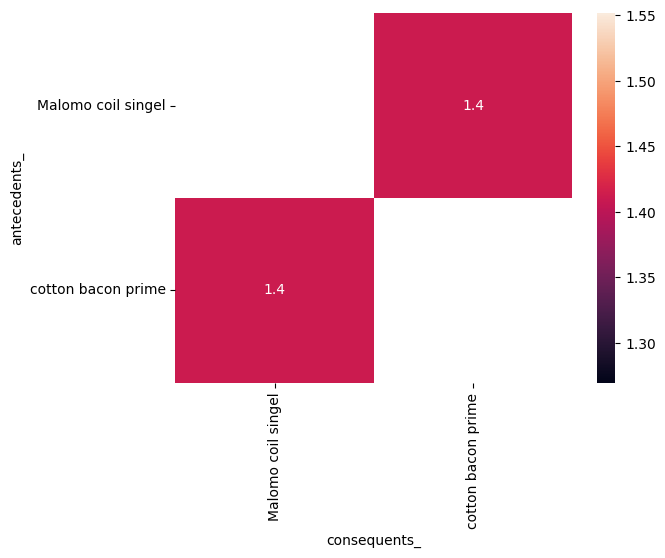

In [ ]:
apriori_rules['lhs_items'] = apriori_rules['antecedents'].apply(lambda x:len(x) )
apriori_rules[apriori_rules['lhs_items']>1].sort_values('lift', ascending=False).head()
apriori_rules['antecedents_'] = apriori_rules['antecedents'].apply(lambda a: ','.join(list(a)))
apriori_rules['consequents_'] = apriori_rules['consequents'].apply(lambda a: ','.join(list(a)))
pivot = apriori_rules[apriori_rules['lhs_items']==1].pivot(index = 'antecedents_', columns = 'consequents_', values= 'lift')
# apriori_rules
sns.heatmap(pivot, annot = True)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

In [ ]:
!pip install PyARMViz

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# import shutil
# shutil.rmtree('/content/PyARMViz')
# shutil.rmtree('/content/PyARMVizj')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from PyARMViz.Rule import generate_rule_from_dict
import numpy as np
apriori_vis = apriori_rules

apriori_vis['uni'] = np.nan
apriori_vis['ant'] = np.nan
apriori_vis['con'] = np.nan
apriori_vis['tot'] = 51086 #sesuai baris dataset hasil pengolahan

def tran():
    for t in transactions:
        yield t
def antec(x):
    cnt = 0
    for t in tran():
        t = set(t)
        if x.intersection(t) == x:
            cnt = cnt + 1
    return cnt
vis = apriori_vis.values.tolist()

rules_dict = []
for i in vis:
    i[10] = antec(i[0])
    i[11] = antec(i[1])
    i[9] = antec(i[0].union(i[1]))
    diction = {
        'lhs': tuple(i[0]),
        'rhs': tuple(i[1]),
        'count_full': i[9],
        'count_lhs': i[10],
        'count_rhs': i[11],
        'num_transactions': i[12]
    }
    rules_dict.append(diction)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
rules_dict

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[{'lhs': ('cotton bacon prime',),
  'rhs': ('Malomo coil singel',),
  'count_full': 0,
  'count_lhs': 0,
  'count_rhs': 0,
  'num_transactions': 'Malomo coil singel'},
 {'lhs': ('Malomo coil singel',),
  'rhs': ('cotton bacon prime',),
  'count_full': 0,
  'count_lhs': 0,
  'count_rhs': 0,
  'num_transactions': 'cotton bacon prime'}]

In [ ]:
!pip install networkx
!pip install plotly

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# import plotly.graph_objects as go
# import networkx as nx
# import numpy as np

# from PyARMViz.Rule import Rule

# from typing import List
# import itertools

# import logging

# import math

# def metadata_scatter_plot(rules:List, allow_compound_flag:bool=False):
#     '''
#     Visualizes the distribution of Association Rule Confidence, Support and Lift in the form of a
#     Plotly scatterplot
#     '''
#     id_list = []
#     confidence_list = []
#     lift_list = []
#     support_list = []

#     for rule in rules:
#         #Discard compound rules (either pre or antecedents) if indicated
#         if allow_compound_flag == False:
#             if len(rule.rhs) > 1 or len(rule.lhs) > 1:
#                 continue

#         confidence_list.append(rule.confidence)
#         lift_list.append(rule.lift)
#         support_list.append(rule.support)
#         hover_text = "{} => {}, Lift: {}".format(rule.lhs, rule.rhs, rule.lift)
#         id_list.append(hover_text)

#     colorbar=dict(
#         tick0=0,
#         dtick=1
#     )


#     fig = go.Figure(data=go.Scatter(x=support_list, y=confidence_list, text = id_list, mode='markers', marker={'color': lift_list, 'colorscale': "purp", 'colorbar':{'title': 'Lift'}},))
#     fig.update_layout(title="Association Rules Strength Distribution", xaxis_title="Support", yaxis_title="Confidence", xaxis={'autorange':'reversed'},)
#     fig.show()
#     return fig

# def adjacency_parallel_category_plot(rules:List):
#     '''
#         Visualizes the antecedents and consequents of each association rules by drawing lines
#         representing each rule across identical vertical axes representing the potential items
#         in the entire dataset

#         Similar to parallel coordinate plot but more readible for small numbers of categorical
#         points
#     '''
#     unique_entities_by_axis_count = []
#     rules_by_axis_count = []
#     for rule in rules:
#         axis_required = len(rule.lhs) + 1

#         #Filter out rules with multiple consequents
#         #TODO consider allowing multiple consequents
#         if len(rule.rhs) == 1:
#             #If the rules_by_axis_count list lacks a slot for the current number of antacedents, add them
#             while len(rules_by_axis_count) < axis_required - 1:
#                 rules_by_axis_count.append([])
#                 unique_entities_by_axis_count.append(set())

#             #Add the rule and the entities found in its atecedents and consequents to their respective structure
#             rules_by_axis_count[axis_required - 2].append(rule)
#             unique_entities_by_axis_count[axis_required - 2] = unique_entities_by_axis_count[axis_required - 2].union(set(rule.lhs), set(rule.rhs))

#     axis_counter = 2
#     for rules, unique_entities in zip(rules_by_axis_count, unique_entities_by_axis_count):
#         line_color = list(map(lambda rule: round(rule.confidence, 2), rules))

#         dimensions = _parallel_category_builder(rules, axis_counter)
#         fig = go.Figure(data=
#             go.Parcats(
#                 dimensions = dimensions,
#             )
#         )

#         fig.update_layout(
#             plot_bgcolor = 'white',
#             paper_bgcolor = 'white'
#         )

#         fig.show()
#         axis_counter += 1

# def adjacency_parallel_coordinate_plot(rules:List):
#     '''
#         Visualizes the antecedents and consequents of each rule by drawing lines
#         representing each rule across identical vertical axis representing the
#         potential items in the set

#         Has the advantage of making it easier to visualize compound rules over
#         scatterplots
#     '''

#     #These two structures track the rules and entities therein based on the number of antecedents/consequents involved
#     #Allows us to visualize each number separately in a parallel coordinate graph
#     #Note these are indexed 0->2 axis on (no association rule can have less then 2)
#     unique_entities_by_axis_count = []
#     rules_by_axis_count = []
#     for rule in rules:
#         axis_required = len(rule.lhs) + 1

#         #Filter out rules with multiple consequents
#         #TODO consider allowing multiple consequents
#         if len(rule.rhs) == 1:
#             #If the rules_by_axis_count list lacks a slot for the current number of antacedents, add them
#             while len(rules_by_axis_count) < axis_required - 1:
#                 rules_by_axis_count.append([])
#                 unique_entities_by_axis_count.append(set())

#             #Add the rule and the entities found in its atecedents and consequents to their respective structure
#             rules_by_axis_count[axis_required - 2].append(rule)
#             unique_entities_by_axis_count[axis_required - 2] = unique_entities_by_axis_count[axis_required - 2].union(set(rule.lhs), set(rule.rhs))


#     axis_counter = 2
#     for rules, unique_entities in zip(rules_by_axis_count, unique_entities_by_axis_count):
#         unique_entities = list(unique_entities)
#         unique_entities = _parallel_coord_axis_optimizer(rules, unique_entities, axis_counter)

#         line_color = list(map(lambda rule: round(rule.confidence, 2), rules))

#         dimensions = _paracoord_builder(rules, unique_entities, axis_counter)
#         fig = go.Figure(data=
#             go.Parcoords(
#                 line = dict(color = line_color,
#                            colorscale = [[0,'white'], [1,'red']]),
#                 dimensions = dimensions
#             )
#         )

#         fig.update_layout(
#             plot_bgcolor = 'white',
#             paper_bgcolor = 'white'
#         )

#         fig.show()
#         axis_counter += 1

# def _parallel_coord_axis_optimizer(rules:List, unique_entities:List, axis_count:int):
#     '''
#         Accepts the rules, a list of the entities to be included in each axis, and the number of axis

#         Runs simulations to identify the optimum configuration of entities on those axis in order to
#         avoid crossings

#         Returns that optimum configuration as an ordered list
#     '''
#     #Generate all possible combinations of entities on the axis and calculate their expected crossings
#     max_iterations = 1000
#     cross_counts = []
#     permutations = set()

#     iteration_counter = 0
#     maximum_permutations = math.factorial(len(unique_entities))
#     while len(permutations) < maximum_permutations and len(permutations) < max_iterations:
#         perm = np.random.permutation(unique_entities)
#         permutations.add(tuple(perm))
#         iteration_counter += 1
#     permutations = list(permutations)
#     logging.info("Finished computing {} random axis entity arrangement permutations in {} iterations".format(len(permutations), iteration_counter))

#     for permutation in permutations:
#         cross_count = _parallel_coord_cross_counter(rules, permutation, axis_count)
#         cross_counts.append(cross_count)
#         logging.debug("Counted {} crossings for {}".format(cross_count, permutation))

#     optimum_cross_count = min(cross_counts)
#     optimum_axis_configuration = permutations[cross_counts.index(optimum_cross_count)]
#     logging.info("Found optimum solution {} with {} crossings".format(optimum_axis_configuration, min(cross_counts)))
#     return optimum_axis_configuration

# def _parallel_coord_cross_counter(rules:List, unique_entities_permutation:List, axis_count:int):
#     '''
#         Accepts an axis configuration and computes the number of crossings across all consecutive
#         axis pairs in order to determine the overall number of crossings

#         Note this approach works because the entity order is synchronized on all axis

#         Returns the number of crossings
#     '''

#     #Iterates through consecutive axis pairs
#     cross_count = 0
#     for axis_index in range(0, axis_count - 1):
#         #Generate all possible pairs of relevant rules and test if they cross for this axis
#         combinations = itertools.combinations(rules, 2)
#         for rule1, rule2 in combinations:
#             if axis_index < (axis_count - 1) - 1:
#                 src_axis_position1 = rule1.lhs[axis_index]
#                 dst_axis_position1 = rule2.lhs[axis_index]
#                 src_axis_position2 = rule1.lhs[axis_index + 1]
#                 dst_axis_position2 = rule2.lhs[axis_index + 1]
#             #Handles the final axis pair which involves the consequent
#             else:
#                 src_axis_position1 = rule1.lhs[axis_index]
#                 dst_axis_position1 = rule2.lhs[axis_index]
#                 src_axis_position2 = rule1.rhs[0]
#                 dst_axis_position2 = rule2.rhs[0]

#             src_delta = unique_entities_permutation.index(src_axis_position1) - unique_entities_permutation.index(src_axis_position2)
#             dst_delta = unique_entities_permutation.index(dst_axis_position1) - unique_entities_permutation.index(dst_axis_position2)

#             #A cross exists only if the edges terminations swap being above/below the other on each side
#             if src_delta < 0 and dst_delta > 0:
#                 cross_count += 1
#             elif src_delta > 0 and dst_delta < 0:
#                 cross_count += 1
#     return cross_count

# def _paracoord_builder(rules:List, unique_entities:List, axis_count:int):
#     '''
#         Helper function to generate list of unique entities across all provided rules to build axis_index
#     '''
#     axis_objects = []
#     for axis_index in range(0,axis_count):
#         if axis_index < axis_count - 1:
#             antacedent_count = abs(axis_index - (axis_count - 1))
#             label = "Antacedent {}".format(antacedent_count)
#         else:
#             label = "Consequent"


#         #Iterate through rules, identify those relevant to that axis_index, and collect their values
#         values = []
#         for rule in rules:
#             #For all but the last axis_index, pull value from the left hand antacedents
#             if axis_index < axis_count - 1:
#                 #If available, pull out the antacedent for this axis_index, otherwise add placeholder
#                 if axis_index > len(rule.lhs) - 1:
#                     values.append(None)
#                 else:
#                     #Note field contains the index of the value on the axis_index
#                     values.append(unique_entities.index(rule.lhs[axis_index]))
#             #Otherwise add the right hand consequent
#             else:
#                 #Note field contains the index of the value on the axis_index
#                 values.append(unique_entities.index(rule.rhs[0]))

#         #Compose the plot object for this axis_index
#         axis_object = dict(
#             range = [0, len(unique_entities)],
#             label=label,
#             ticktext=unique_entities,
#             tickvals=list(range(0, len(unique_entities))),
#             values=values
#         )
#         axis_objects.append(axis_object)

#     return axis_objects

# def _parallel_category_builder(rules:List, axis_count:int):
#     '''
#         Helper function to generate list of unique entities across all provided rules to build axis_index
#     '''
#     axis_objects = []
#     for axis_index in range(0,axis_count):
#         if axis_index < axis_count - 1:
#             antacedent_count = abs(axis_index - (axis_count - 1))
#             label = "Antacedent {}".format(antacedent_count)
#         else:
#             label = "Consequent"

#         #Iterate through rules, identify those relevant to that axis_index, and collect their values
#         values = []
#         for rule in rules:
#             #For all but the last axis_index, pull value from the left hand antacedents
#             if axis_index < axis_count - 1:
#                 #If available, pull out the antacedent for this axis_index, otherwise add placeholder
#                 if axis_index > len(rule.lhs) - 1:
#                     values.append(None)
#                 else:
#                     #Note field contains the index of the value on the axis_index
#                     values.append(rule.lhs[axis_index])
#             #Otherwise add the right hand consequent
#             else:
#                 #Note field contains the index of the value on the axis_index
#                 values.append(rule.rhs[0])
#         #Compose the plot object for this axis_index
#         axis_object = dict(
#             label=label,
#             values=values,
#         )
#         axis_objects.append(axis_object)

#     return axis_objects

# def adjacency_graph_plotly(rules:Rule):
#     '''
#         This is the plotly version of the
#     '''
#     graph = _adjacency_graph_generator(rules)
#     pos = nx.spring_layout(graph, iterations=100)

#     edge_x = []
#     edge_y = []
#     for edge in graph.edges():
#         src_node_ind = edge[0]
#         dst_node_ind = edge[1]
#         x0, y0 =  pos[src_node_ind]
#         x1, y1 =  pos[dst_node_ind]
#         edge_x.append(x0)
#         edge_x.append(x1)
#         edge_x.append(None)
#         edge_y.append(y0)
#         edge_y.append(y1)
#         edge_y.append(None)

#     edge_trace = go.Scatter(
#         x=edge_x, y=edge_y,
#         line=dict(width=0.5, color='#888'),
#         hoverinfo='none',
#         mode='lines')

#     node_text = []
#     node_x = []
#     node_y = []
#     for node in graph.nodes():
#         x, y = pos[node]
#         node_x.append(x)
#         node_y.append(y)
#         node_text.append(node)


#     node_trace = go.Scatter(
#         x=node_x, y=node_y,
#         mode='markers',
#         hoverinfo='text',
#         text=node_text,
#         marker=dict(
#             showscale=True,
#             # colorscale options
#             #'Greys' | 'YlGnBu' | 'Greens' | 'YlOrRd' | 'Bluered' | 'RdBu' |
#             #'Reds' | 'Blues' | 'Picnic' | 'Rainbow' | 'Portland' | 'Jet' |
#             #'Hot' | 'Blackbody' | 'Earth' | 'Electric' | 'Viridis' |
#             colorscale='YlGnBu',
#             reversescale=True,
#             color=[],
#             size=10,
#             colorbar=dict(
#                 thickness=15,
#                 title='Node Connections',
#                 xanchor='left',
#                 titleside='right'
#             ),
#             line_width=2))
#     fig = go.Figure(data=[edge_trace, node_trace],
#          layout=go.Layout(
#             title='<br>Network graph made with Python',
#             titlefont_size=16,
#             showlegend=False,
#             hovermode='closest',
#             margin=dict(b=20,l=5,r=5,t=40),
#             annotations=[ dict(
#                 text="Python code: <a href='https://plotly.com/ipython-notebooks/network-graphs/'> https://plotly.com/ipython-notebooks/network-graphs/</a>",
#                 showarrow=False,
#                 xref="paper", yref="paper",
#                 x=0.005, y=-0.002 ) ],
#             xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
#             yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
#             )
#     fig.show()

# def adjacency_graph_gephi(rules:List[Rule], output_path:str=None):
#     '''
#     Uses networkX to produce a directed graph representation of the generated
#     association rules (both 1-to-1 and compound).

#     Either displays the resulting graph in the browser with Plotly or
#     export it as a graphml file to be viewed in a program like Gephi
#     '''
#     graph = _adjacency_graph_generator(rules)
#     nx.write_gexf(graph, output_path)
#     logging.debug("Output rule graph to {}".format(output_path))
#     return graph

# def _adjacency_graph_generator(rules:List[Rule]):
#     '''
#         Helper function to generate a directional network graph using the antecedents and
#         precedents of each Association Rule. This allows the user to discern higher level
#         structures such as chains and hubs which are formed by adjacent rules.

#         The resulting graph can then be visualized through a variety of means
#     '''
#     graph = nx.DiGraph()
#     for index, rule in enumerate(rules):
#         graph.add_node (index, Weight=int(rule.confidence*10), type="Association_Rule")

#         for entity in rule.lhs:
#             graph.add_node(entity, Weight=1, type="Entity")
#             graph.add_edge(entity, index, Normalized_Lift=int(rule.lift*10))

#         for entity in rule.rhs:
#             graph.add_node(entity, Weight=1, type="Entity")
#             graph.add_edge(index, entity, Normalized_Lift=int(rule.lift*10))

#     logging.debug("Generated NetworkX graph for {} rules with {} nodes".format(len(rules), len(graph.nodes)))
#     return graph



# def adjacency_scatter_plot(rules:List[Rule], notebook_flag:bool = False):
#     '''
#     Generates a plot showing the distribution of association rules in terms of association
#     rules between antecedent and consequent entities, support and confidence

#     Visulizes this plot as a Plotly scattergraph and views it in the browser
#     '''
#     unique_values = set()
#     x_axis = []
#     y_axis = []
#     strength = []
#     for index, rule in enumerate(rules):
#         x_axis.append(str(rule.rhs))
#         y_axis.append(str(rule.lhs))
#         strength.append(20 * rule.confidence)
#         unique_values.add(str(rule.rhs))
#         unique_values.add(str(rule.lhs))

#     #Generate distance matrix view
#     fig = go.Figure()

#     fig.add_trace(go.Scatter(
#         x=x_axis,
#         y=y_axis,
#         mode="markers",
#         marker = {'size':strength},
#         name='Association rules',
#     ))

#     fig.show()
#     return fig

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
rules = []
for rd in rules_dict:
    rules.append(generate_rule_from_dict(rd))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[{cotton bacon prime} -> {Malomo coil singel},
 {Malomo coil singel} -> {cotton bacon prime}]